Since the machine leanring classification model is not properly able to distinguish the different prostate cancer severity. 
Performing the deep learning network to see if it can learn something from the different layers using Tensorflow

### Deep Learning using TensorFlow

In [1]:
### Python envrionment Select Kernel py310
import os
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib

2025-03-07 08:52:38.686665: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1741366358.848089 4105225 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1741366358.881458 4105225 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-07 08:52:39.386210: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
os.chdir("/diazlab/data3/.abhinav/projects/SHH/Cancerdb/")
xtrain = pd.read_csv("TCGA/data/xtrain.csv", index_col=0)
ytrain = pd.read_csv("TCGA/data/ytrain.csv", index_col=0)
xtest = pd.read_csv("TCGA/data/xtest.csv", index_col=0)
ytest = pd.read_csv("TCGA/data/ytest.csv", index_col=0)

In [3]:
from tensorflow.keras.utils import to_categorical
train_label = to_categorical(ytrain, num_classes = 3)

In [4]:
print(xtrain.shape)
print(train_label.shape)
print(xtest.shape)
print(ytest.shape)

(417, 5909)
(417, 3)
(105, 5909)
(105, 1)


3
5909
[[0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 ...
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]


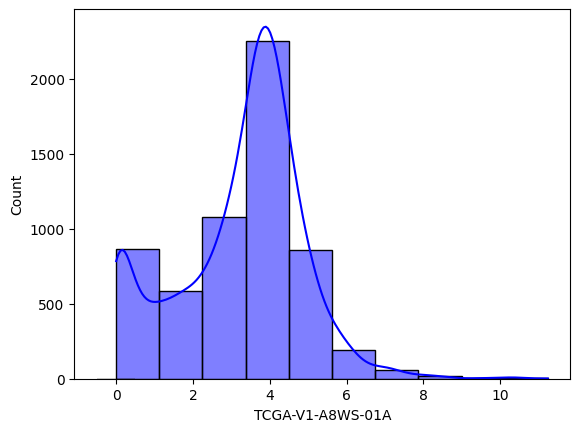

In [6]:
sns.histplot(xtrain.iloc[140], kde=True, bins=10, color='blue', edgecolor='black')
sns.histplot(ytrain.iloc[140], kde=True, bins=10, color='blue', edgecolor='black')
print(train_label.shape[1])
print(xtrain.shape[1])
print(train_label)

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam

NNarray = [4096, 2048, 1024, 512]

model = Sequential()

# Add layers to the model
model.add(Dense(units=NNarray[0], activation='relu', input_shape=(xtrain.shape[1],)))
model.add(Dense(units=NNarray[1], activation='relu'))
model.add(Dense(units=NNarray[2], activation='relu'))
model.add(Dense(units=NNarray[3], activation='relu'))
model.add(Dense(units=train_label.shape[1], activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(learning_rate = 0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model
history = model.fit(
    xtrain,
    train_label,
    epochs=200,
    batch_size=xtrain.shape[0] // 10,  # This will be similar to `dim(train_data)[1]/25` in R
)

/diazlab/data3/.abhinav/tools/miniconda3/envs/py310/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-03-07 08:53:28.013898: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Epoch 1/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 151ms/step - accuracy: 0.3634 - loss: 2.5786
Epoch 2/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 145ms/step - accuracy: 0.3724 - loss: 0.9204
Epoch 3/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 141ms/step - accuracy: 0.4359 - loss: 0.8706
Epoch 4/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 152ms/step - accuracy: 0.3911 - loss: 0.7208
Epoch 5/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 144ms/step - accuracy: 0.4661 - loss: 0.6757
Epoch 6/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 139ms/step - accuracy: 0.4117 - loss: 0.6497
Epoch 7/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 139ms/step - accuracy: 0.4651 - loss: 0.6955
Epoch 8/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 143ms/step - accuracy: 0.4953 - loss: 0.6290
Epoch 9/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 142ms/step - accuracy: 0.4947 - loss: 0.6094
Epoch 10/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 143ms/step - accuracy: 0.4354 - loss: 0.6282
Epoch 11/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 139ms/step - accuracy: 0.4695 - loss: 0.6189
Epoch 12/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 2

In [8]:
import tensorflow as tf
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))

# Ensure TensorFlow is using GPU
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)  # Prevents memory overflow
        tf.config.set_visible_devices(gpus[0], 'GPU')  # Use only the first GPU
        print("Using GPU:", gpus[0])
    except RuntimeError as e:
        print(e)


Num GPUs Available: 0


In [13]:
print(history.history.keys())

dict_keys(['accuracy', 'loss'])


dict_keys(['accuracy', 'loss'])


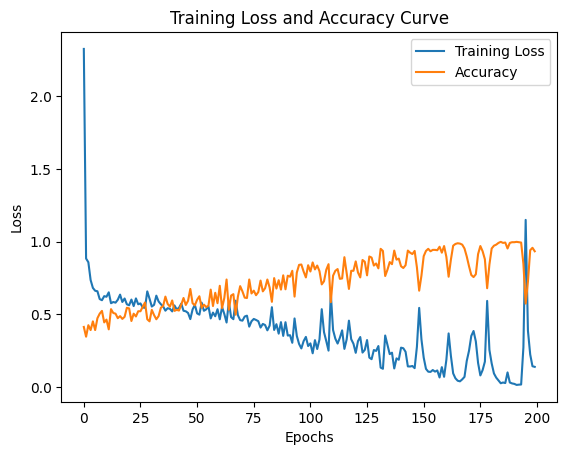

In [15]:
### predicting the data on the test set
print(history.history.keys())  # Shows metrics like 'loss', 'accuracy', 'val_loss', 'val_accuracy'

# Plot loss curve
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['accuracy'], label='Accuracy')
# plt.plot(history.history.get('val_loss', []), label='Validation Loss')  # Only if validation_split was used
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss and Accuracy Curve")
plt.legend()
plt.show()

In [16]:
### It looks like it is overfitting the data
y_pred = model.predict(xtest)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


In [18]:
y_pred_labels = (y_pred > 0.5).astype(int)  # Convert probabilities to 0 or 1

In [29]:
from tensorflow.keras.utils import to_categorical
test_label = to_categorical(ytest, num_classes = 3)

In [ ]:
import numpy as np

# Converting one-hot encoded labels to class indices
y_test_labels = np.argmax(test_label, axis=1)  
y_pred_labels = np.argmax(y_pred, axis=1)


In [55]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test_labels, y_pred_labels)
print(f"Test Accuracy: {accuracy:.4f}")


Test Accuracy: 0.4667


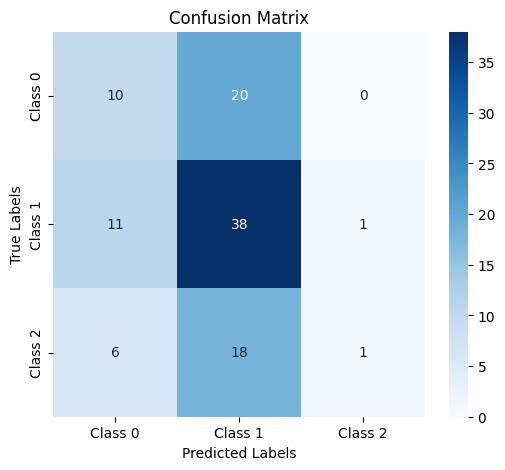

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
            xticklabels=["Class 0", "Class 1", "Class 2"], 
            yticklabels=["Class 0", "Class 1", "Class 2"])

plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


In [49]:
from sklearn.metrics import classification_report
print("Classification Report:\n", classification_report(y_test_labels, y_pred_labels))


Classification Report:
               precision    recall  f1-score   support

           0       0.37      0.33      0.35        30
           1       0.50      0.76      0.60        50
           2       0.50      0.04      0.07        25

    accuracy                           0.47       105
   macro avg       0.46      0.38      0.34       105
weighted avg       0.46      0.47      0.41       105



In [ ]:
#### Since the model is overfitting trying to decrease the number of layers

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2

# NNarray = [4096, 2048, 1024, 512]
NNarray = [512, 256, 128, 64]

model = Sequential()
# Use Dropout Regularization
# Add layers to the model
model.add(Dense(units=NNarray[0], activation='relu', input_shape=(xtrain.shape[1],)))
model.add(Dropout(0.1))
model.add(Dense(units=NNarray[1], activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=NNarray[2], activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=NNarray[3], activation='relu'))
model.add(Dense(units=train_label.shape[1], activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(learning_rate = 0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    xtrain,
    train_label, 
    epochs=200, 
    batch_size=64,
    validation_split=0.1, 
    callbacks=[early_stopping]
    )

Epoch 1/200


/diazlab/data3/.abhinav/tools/miniconda3/envs/py310/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - accuracy: 0.4620 - loss: 2.5016 - val_accuracy: 0.5000 - val_loss: 0.9854
Epoch 2/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.4409 - loss: 1.6192 - val_accuracy: 0.3095 - val_loss: 1.1391
Epoch 3/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.3333 - loss: 1.5129 - val_accuracy: 0.5476 - val_loss: 1.3001
Epoch 4/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.3947 - loss: 1.3969 - val_accuracy: 0.5000 - val_loss: 1.0344
Epoch 5/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.3996 - loss: 1.2123 - val_accuracy: 0.5476 - val_loss: 1.0040
Epoch 6/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.4043 - loss: 1.2262 - val_accuracy: 0.5476 - val_loss: 1.0224
Epoch 7/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.3770 - loss: 1.1687 - val_accuracy: 0.5714 - val_loss: 1.0219
Epoch 8/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.3853 - loss: 1.1429 - val_accuracy: 0.5714 - val_loss: 1.0128
Epoc

In [67]:
print(xtrain.shape)
print(train_label)
print(train_label.shape)

(417, 5909)
[[0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 ...
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]
(417, 3)


In [95]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
from sklearn.decomposition import PCA
import numpy as np
from tensorflow.keras.callbacks import ReduceLROnPlateau



# Reduce input features using PCA
pca = PCA(n_components=0.95)  # Retain 95% of the variance
xtrain_reduced = pca.fit_transform(xtrain)
xtest_reduced = pca.transform(xtest)

# Define smaller architecture
# NNarray = [256, 128, 64, 32]
NNarray = [512, 256, 128, 64]
model = Sequential()

model.add(Dense(NNarray[0], activation='relu', kernel_regularizer=l2(0.0001), input_shape=(xtrain_reduced.shape[1],)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
# Internal Covariate Shift:
# During training, the distribution of activations (i.e., outputs of the neurons) in each layer can change as the parameters of previous layers are updated. 
# This phenomenon is called internal covariate shift, and it can make training difficult and slow.
# Batch normalization helps address this by normalizing the activations for each mini-batch, ensuring that each layer receives inputs with a stable distribution throughout training.

# L2 regularization adds a penalty to large weights for the features to avoid overfitting in the neural network.
# This prevents overfitting by discouraging overly complex models.
# It modifies the loss function by adding an extra term:
# Loss = Original Loss + lambda Summation(w^2)
# where λ (lambda) is a hyperparameter that controls regularization strength, and w are the model's weights.

model.add(Dense(NNarray[1], activation='relu', kernel_regularizer=l2(0.0001)))
model.add(Dropout(0.2)) 
# Dropout randomly turns off some neurons during training to force the model to learn better general patterns.
# Example: If Dropout = 0.2, then 20% of neurons are ignored at each step.

model.add(Dense(NNarray[2], activation='relu', kernel_regularizer=l2(0.0001)))
model.add(Dropout(0.2))

model.add(Dense(NNarray[3], activation='relu'))
model.add(Dense(train_label.shape[1], activation='softmax'))  # Softmax for multi-class

# Compile with lower learning rate
model.compile(optimizer=Adam(learning_rate=1e-05), loss='categorical_crossentropy', metrics=['accuracy'])

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train with higher validation split
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.5, min_lr=1e-7)
print(model.summary())
history = model.fit(
    xtrain_reduced, train_label,
    epochs=200,
    batch_size=32,
    validation_split=0.2,  # Use 20% validation data
    callbacks=[early_stopping, lr_scheduler]
)


/diazlab/data3/.abhinav/tools/miniconda3/envs/py310/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_29"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_141 (Dense)               │ (None, 512)            │       113,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_39          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_78 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_142 (Dense)               │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_79 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_143 (Dense)               │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_80 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_144 (Dense)               │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_145 (Dense)               │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 287,875 (1.10 MB)

 Trainable params: 286,851 (1.09 MB)

 Non-trainable params: 1,024 (4.00 KB)

None
Epoch 1/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.4052 - loss: 1.4889 - val_accuracy: 0.4167 - val_loss: 1.7694 - learning_rate: 1.0000e-05
Epoch 2/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3202 - loss: 1.5206 - val_accuracy: 0.4167 - val_loss: 1.6481 - learning_rate: 1.0000e-05
Epoch 3/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3409 - loss: 1.4594 - val_accuracy: 0.4286 - val_loss: 1.5634 - learning_rate: 1.0000e-05
Epoch 4/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3775 - loss: 1.4855 - val_accuracy: 0.4286 - val_loss: 1.5008 - learning_rate: 1.0000e-05
Epoch 5/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4080 - loss: 1.3399 - val_accuracy: 0.4048 - val_loss: 1.4557 - learning_rate: 1.0000e-05
Epoch 6/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3683 - loss: 1.3845 - val_accuracy: 0.4167 - val_loss: 1.4186 - learning_rate: 1.0000e-05
Epoch 7/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accur